<a href="https://colab.research.google.com/github/richayanamandra/GenAI-Experiments/blob/main/genAI_lab2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [7]:
dataset_choice = "fashion"
epochs = 50
batch_size = 128
noise_dim = 100
learning_rate = 0.0002
save_interval = 5


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 186kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.7MB/s]


In [10]:
#Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 28, 28)


In [11]:
#Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img = img.view(img.size(0), -1)
        return self.model(img)


In [12]:
generator = Generator(noise_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)


In [13]:
#Display Function
def show_samples(epoch, generator):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(25, noise_dim).to(device)
        fake_imgs = generator(z)
        grid = make_grid(fake_imgs, nrow=5, normalize=True)

        plt.figure(figsize=(5,5))
        plt.title(f"Generated Samples — Epoch {epoch}")
        plt.imshow(grid.permute(1, 2, 0).cpu())
        plt.axis("off")
        plt.show()

    generator.train()


Epoch 1/50 | D_loss: 268.24 | D_acc: 86.87% | G_loss: 1223.97
Epoch 2/50 | D_loss: 136.55 | D_acc: 96.25% | G_loss: 1981.12
Epoch 3/50 | D_loss: 190.89 | D_acc: 94.49% | G_loss: 2501.73
Epoch 4/50 | D_loss: 206.08 | D_acc: 94.25% | G_loss: 2174.94
Epoch 5/50 | D_loss: 258.87 | D_acc: 91.48% | G_loss: 1725.39


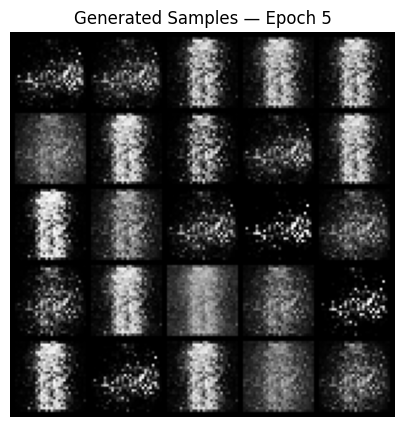

Epoch 6/50 | D_loss: 223.98 | D_acc: 92.38% | G_loss: 1517.33
Epoch 7/50 | D_loss: 379.69 | D_acc: 85.07% | G_loss: 1494.84
Epoch 8/50 | D_loss: 284.55 | D_acc: 88.90% | G_loss: 1285.73
Epoch 9/50 | D_loss: 219.89 | D_acc: 92.46% | G_loss: 1362.85
Epoch 10/50 | D_loss: 240.22 | D_acc: 90.96% | G_loss: 1576.38


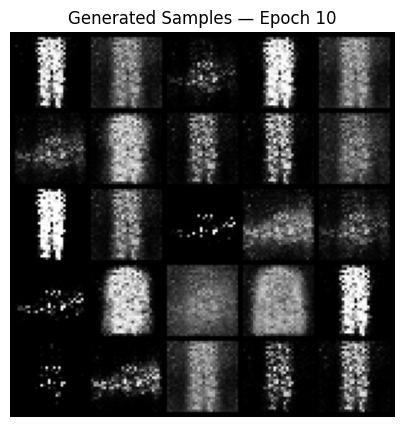

Epoch 11/50 | D_loss: 268.78 | D_acc: 90.11% | G_loss: 1556.72
Epoch 12/50 | D_loss: 272.22 | D_acc: 89.84% | G_loss: 1471.01
Epoch 13/50 | D_loss: 287.94 | D_acc: 88.77% | G_loss: 1435.23
Epoch 14/50 | D_loss: 277.65 | D_acc: 89.88% | G_loss: 1338.88
Epoch 15/50 | D_loss: 263.26 | D_acc: 90.47% | G_loss: 1378.35


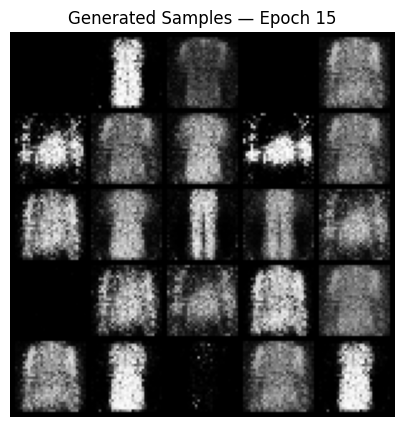

Epoch 16/50 | D_loss: 422.51 | D_acc: 84.70% | G_loss: 1452.90
Epoch 17/50 | D_loss: 281.23 | D_acc: 89.51% | G_loss: 1230.94
Epoch 18/50 | D_loss: 293.63 | D_acc: 88.55% | G_loss: 1198.83
Epoch 19/50 | D_loss: 348.10 | D_acc: 85.97% | G_loss: 1102.72
Epoch 20/50 | D_loss: 360.20 | D_acc: 85.06% | G_loss: 1078.62


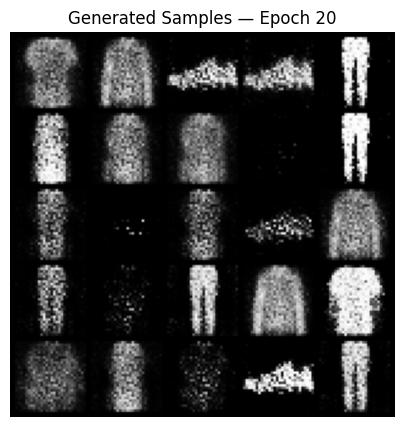

Epoch 21/50 | D_loss: 369.21 | D_acc: 84.82% | G_loss: 1070.47
Epoch 22/50 | D_loss: 383.48 | D_acc: 84.03% | G_loss: 978.84
Epoch 23/50 | D_loss: 405.97 | D_acc: 83.30% | G_loss: 919.94
Epoch 24/50 | D_loss: 409.21 | D_acc: 82.54% | G_loss: 1101.56
Epoch 25/50 | D_loss: 372.89 | D_acc: 84.10% | G_loss: 913.96


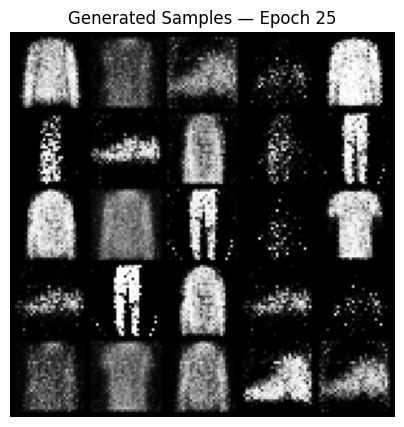

Epoch 26/50 | D_loss: 419.18 | D_acc: 81.47% | G_loss: 997.11
Epoch 27/50 | D_loss: 411.64 | D_acc: 81.06% | G_loss: 948.36
Epoch 28/50 | D_loss: 412.67 | D_acc: 81.39% | G_loss: 866.79
Epoch 29/50 | D_loss: 402.77 | D_acc: 82.11% | G_loss: 884.21
Epoch 30/50 | D_loss: 433.38 | D_acc: 80.07% | G_loss: 821.97


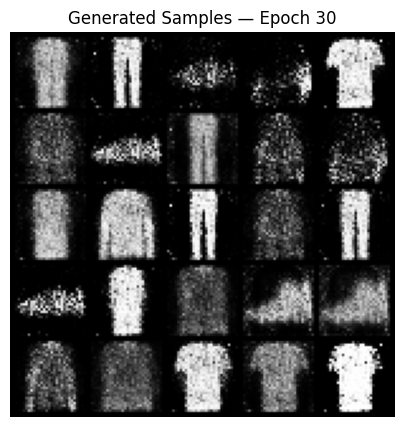

Epoch 31/50 | D_loss: 476.35 | D_acc: 77.53% | G_loss: 850.80
Epoch 32/50 | D_loss: 448.31 | D_acc: 79.41% | G_loss: 718.67
Epoch 33/50 | D_loss: 475.91 | D_acc: 76.94% | G_loss: 734.82
Epoch 34/50 | D_loss: 457.57 | D_acc: 78.54% | G_loss: 749.64
Epoch 35/50 | D_loss: 519.35 | D_acc: 73.73% | G_loss: 785.36


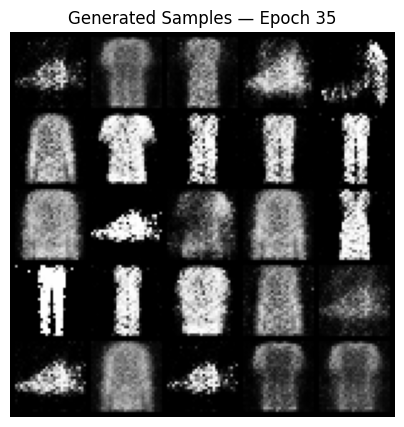

Epoch 36/50 | D_loss: 462.55 | D_acc: 78.64% | G_loss: 755.40
Epoch 37/50 | D_loss: 492.61 | D_acc: 75.81% | G_loss: 751.82
Epoch 38/50 | D_loss: 495.44 | D_acc: 75.21% | G_loss: 723.19
Epoch 39/50 | D_loss: 500.43 | D_acc: 74.98% | G_loss: 692.31
Epoch 40/50 | D_loss: 480.18 | D_acc: 75.67% | G_loss: 682.00


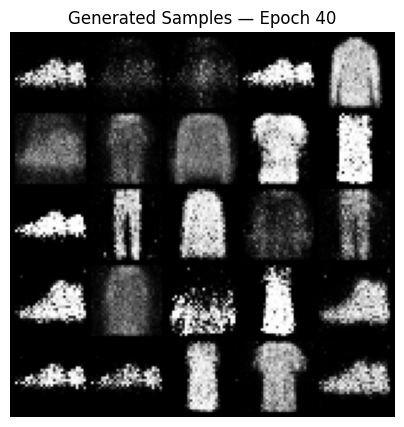

Epoch 41/50 | D_loss: 502.62 | D_acc: 75.47% | G_loss: 756.91
Epoch 42/50 | D_loss: 507.86 | D_acc: 74.03% | G_loss: 666.95
Epoch 43/50 | D_loss: 492.34 | D_acc: 75.40% | G_loss: 736.54
Epoch 44/50 | D_loss: 479.58 | D_acc: 76.97% | G_loss: 644.44
Epoch 45/50 | D_loss: 515.09 | D_acc: 74.37% | G_loss: 749.78


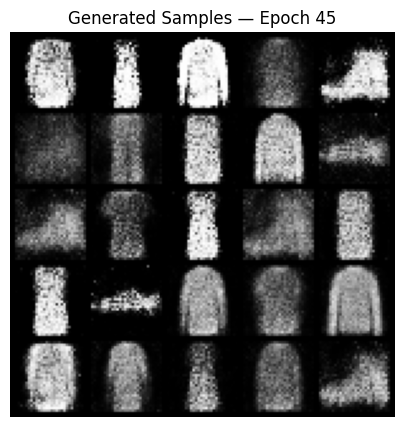

Epoch 46/50 | D_loss: 492.86 | D_acc: 75.33% | G_loss: 632.64
Epoch 47/50 | D_loss: 532.64 | D_acc: 73.32% | G_loss: 756.52
Epoch 48/50 | D_loss: 471.57 | D_acc: 77.43% | G_loss: 618.46
Epoch 49/50 | D_loss: 485.22 | D_acc: 76.55% | G_loss: 743.72
Epoch 50/50 | D_loss: 510.23 | D_acc: 74.61% | G_loss: 683.32


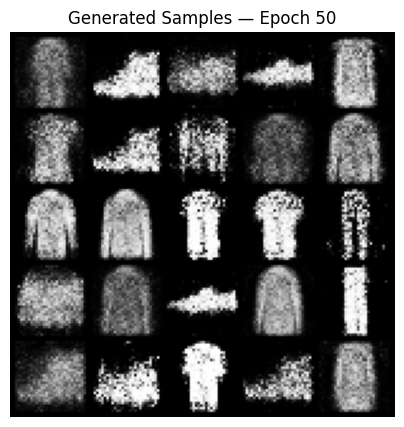

In [14]:
#GAN
for epoch in range(1, epochs + 1):
    d_loss_epoch = 0
    g_loss_epoch = 0
    correct = 0
    total = 0

    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_imgs = generator(z)

        real_preds = discriminator(real_imgs)
        fake_preds = discriminator(fake_imgs.detach())

        d_loss_real = criterion(real_preds, real_labels)
        d_loss_fake = criterion(fake_preds, fake_labels)
        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        correct += (real_preds > 0.5).sum().item()
        correct += (fake_preds < 0.5).sum().item()
        total += batch_size * 2

        # Train Generator
        fake_preds = discriminator(fake_imgs)
        g_loss = criterion(fake_preds, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        d_loss_epoch += d_loss.item()
        g_loss_epoch += g_loss.item()

    d_acc = 100 * correct / total

    print(f"Epoch {epoch}/{epochs} | D_loss: {d_loss_epoch:.2f} | D_acc: {d_acc:.2f}% | G_loss: {g_loss_epoch:.2f}")

    if epoch % save_interval == 0:
        show_samples(epoch, generator)


In [15]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 5 * 5, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)


In [16]:
classifier = Classifier().to(device)
optimizer_C = optim.Adam(classifier.parameters(), lr=0.001)
criterion_C = nn.CrossEntropyLoss()

print("\nTraining Classifier...")

for epoch in range(5):
    for imgs, labels in dataloader:
        imgs, labels = imgs.to(device), labels.to(device)

        preds = classifier(imgs)
        loss = criterion_C(preds, labels)

        optimizer_C.zero_grad()
        loss.backward()
        optimizer_C.step()

    print(f"Classifier Epoch {epoch+1}/5 | Loss: {loss.item():.4f}")



Training Classifier...
Classifier Epoch 1/5 | Loss: 0.3883
Classifier Epoch 2/5 | Loss: 0.3710
Classifier Epoch 3/5 | Loss: 0.2265
Classifier Epoch 4/5 | Loss: 0.3349
Classifier Epoch 5/5 | Loss: 0.2435


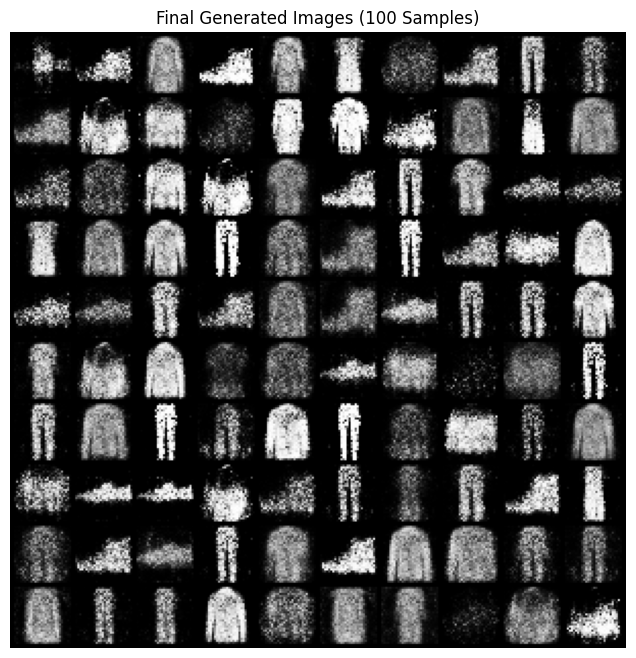

In [17]:
generator.eval()
final_images = []

with torch.no_grad():
    z = torch.randn(100, noise_dim).to(device)
    final_images = generator(z)

grid = make_grid(final_images, nrow=10, normalize=True)

plt.figure(figsize=(8,8))
plt.title("Final Generated Images (100 Samples)")
plt.imshow(grid.permute(1, 2, 0).cpu())
plt.axis("off")
plt.show()